<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Ejemplo_de_caso_de_uso_de_A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo de caso de uso de las pruebas A/B


En este notebook vamos a trabajar un ejemplo de caso de uso de las pruebas A/B (A/B testing) en un servicio digital.



##Antecedentes
Imaginemos que trabajamos en un banco digital, que actualmente tiene problemas con el engagement y la retención de sus clientes.

Los indicadores que maneja la empresa respecto al uso de su servicio digital por parte de sus clientes son:

* Tráfico:  cuenta con una promedio de visitas mensuales de 13.8 Millones
* Engagement: las visitas al servicio tienen una duración promedio de 5:18 minutos
* Rebote: la tasa de rebote del servicio es de 25.91%

<img src='https://drive.google.com/uc?export=view&id=1oS4n7RdWI-Vv26_qUn8XSBbwglbl2oNF' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt" align="center" > 
Imagen gentileza de: Roberto Moraga (workshop A/B testing) </p>

Se ha formado un equipo de Growth hacking, cuyo primer desafío a trabajar es el aumento del **engagement de clientes**.




### Análisis exploratorios

El equipo ha realizado distintos análisis exploratorios y ha encontrado correlaciones entre el tiempo de duración de las visitas al servicio y la tasa de conversión del producto estrella de la compañía (ej: crédito de consumo).

Adicionalmente han encontrado una correlación negativa en el tiempo de duración de las visitas al servicio y el churn de clientes.

Veamos estos análisis y sus conclusiones:

<img src='https://drive.google.com/uc?export=view&id=1QaAfn3vhkDeR1PnLrScfuslKHvKcsCLJ' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga (workshop A/B testing) </p>


<img src='https://drive.google.com/uc?export=view&id=1h4u2Ivo1goTkAFI2yYfKz4C105aK_8YF' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt" align="center" > 
Imagen gentileza de: Roberto Moraga (workshop A/B testing) </p>


Se puede concluir de estos análisis que al aumentar el tiempo de duración de las visitas, esto tendrá un impacto positivo en el Revenue de la compañía ya que aumenta la conversión del producto estrella, y adicionalmente controlará o miniminizará el ratio de fuga de clientes "churn" impactando positivamente en la Retención y con ello en el aumento de clientes y posiblemente en la dismunución de costos de adquisición de nuevos clientes.


### Análisis de rendimiento y tráfico del competidor

Sumado a lo anterior se cuenta con un estudio de inteligencia digital del principal competidor. Las analíticas web reportadas en este estudio indican que este competidor tiene un tráfico promedio mensual de 14.9 millones de visitas (un 7% más que nuestra compañía), con un engagement traducido en tiempo de duración de visitas de 7:01 minutos (casí 2 minutos más que nosotros), y una tasa de rebote de 13.80% (casí la mitad de la actual nuestra).

Veamos la comparativa:

<img src='https://drive.google.com/uc?export=view&id=12a2LGSn_ebh-pMkaF6F7RWIS5CW9EIq4' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:6pt" align="center" > 
Imagen gentileza de: Roberto Moraga
</p>


En suma, con base en los análisis anteriores, el equipo de trabajo ha acordado desarrollar ideas que apunten a aumentar el tiempo promedio de visitas en la página del banco, esto con el objetivo de mover la métrica global de engagement.

La métrica global de engagement podrá ser medida por:

* Promedio de tiempo de las visitas. Si se toma este indicador lo que se buscará es aumentar el actual promedio que es de 5.30 minutos, moviéndolo a valores cercanos a los de la competencia. 
 
 Por ejmplo aquí la dirección del negocio podría definir un efecto mínimo a alcanzar por un tratamiento igual a 30 segundos, es dedir, 0.5 minutos más del actual tiempo promedio.

* Proporción de visitas con tiempo mayor o gual a 7 minutos. Si se toma este indicador lo que se buscará será aumentar el rendimiento actual que es de 25%.

 Por ejmplo aquí la dirección del negocio podría definir un efecto mínimo a alcanzar por un tratamiento igual a 500 puntos base, es dedir, 5 puntos porcentuales adicionales al actual rendimiento.
 
 
A continuación vamos a simular la data de las visitas del mes de junio de nuestra compañía:

In [1]:
#Importamos librerias
import numpy as np #
from scipy import stats 
import matplotlib.pyplot as plt 

In [6]:
#crear data set Distribucion tiempos de visitas
#parametros
media = 5.30
N = 13800000

#descomponer y calcular alpha y beta para proyectar Distribucion Gamma
alpha= 2.4
beta = alpha/media

print('beta: ', beta)
print('alpha: ', alpha)
print('media: ', alpha/beta)
print('sigma: ', np.sqrt(alpha)/beta)

#simular data set con Distribucion gamma
data = np.random.RandomState(seed=1).gamma(alpha, 1/beta, N)
#print(data)

#calcular estadisticos data set
xbar= np.average(data)
s= np.std(data, ddof=1)
print('media muestra: ', xbar)
print('sigma muestra: ', s)



beta:  0.4528301886792453
alpha:  2.4
media:  5.3
sigma:  3.421135289149885
media muestra:  5.301812470454885
sigma muestra:  3.4219780697944824


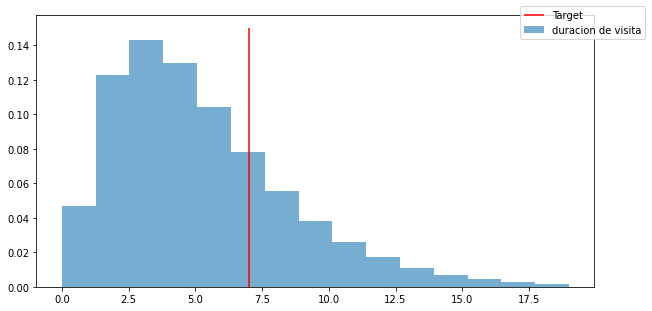

muestra:  13800000
Cantidad en target:  10300689
Cumplimiento target:  0.2535732608695652
media:  5.301812470454885
mediana:  4.587107060960095
cuartil 3:  7.046656308038324
desv. std:  3.4219780697944824


In [9]:
#Umbral Target service time
k = 7 #minutes

#Momento 1
data = data

#Contador cumplimiento Umbral  
count = 0
for i in data : 
    if i <= k : 
        count = count + 1

#calculo estadistica descriptiva
muestra_a = np.size(data)
media_a = np.mean(data)
mediana_a = np.median(data)
per75_a = np.percentile(data, 75)
sigma_a = np.std(data, ddof=1)

#calculo indicador negocio SLA
q_target_a = count
sla_a = 1- (count/muestra_a)

#Graficar
plt.figure(figsize=(10, 5)) #tamaño grafico
plt.hist(data, bins=15, range=[0, 19], alpha=0.6, density="true")
plt.vlines(ymin=0, ymax=0.15, x=k, colors='r')#Z critico
plt.legend(['Target', 'duracion de visita'],bbox_to_anchor=(1.1,1.05))
plt.show()


print('muestra: ', muestra_a)
print("Cantidad en target: ", q_target_a)
print("Cumplimiento target: ", sla_a)
print('media: ', media_a)
print('mediana: ', mediana_a)
print('cuartil 3: ', per75_a)
print('desv. std: ', sigma_a)

## Experimentos

Para optimizar el engagement el equipo de trabajo puede aplicar un ciclo experimentación como el que se presenta en el siguiente diagrama:


<img src='https://drive.google.com/uc?export=view&id=188DgjXaFbW8PrONuIxpAmVEH8luDsY0e' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:6pt" align="center" > 
Imagen gentileza de: Roberto Moraga
</p>





### 0.- Selecciona el desafío de negocio
El punto 0 consiste en escoger el Desafío de Negocio, en este caso: *Aumentar el engagement de clientes*.

El siguiente paso tiene que ver con identificar ideas que podrían generar una:

* mejor experiencia de navegación
* mayor simplicidad de los pasos para que el cliente consiga lo que busca
* mayor personalización de la plataforma
* etc, etc, etc

y gracias a ello hacer que los clientes disfruten el servicio y consigan lo que están buscando, y por cierto vuelvan la próxima vez a consumir el servicio digital, y hagan Referral del banco (nos promuevan en sus redes).

### 1.- Definir la Hipótesis
Ejemplo de una hipótesis:

>*un cambio del orden de las funciones del **menú principal** hará que los clientes no se desconecten del servicio y consigan activar lo que necesitan del banco. Esto lo mediremos con el tiempo de duración de su visita.*


* Métrica de éxito: aquí podríamos tener 2 opciones:
  * Tiempo promedio de duración de la visita en minutos
  * Proporción de visitas que tienen una duración mayor o igual a **7** minutos.



Para esta Hipótesis el equipo de trabajo podría aplicar al menos los siguientes experimentos:

1.   **Experimento no controlado de 1 muestra**

 Desarrollar 1 nueva versión de menú (distinta a la actual productiva) y presentarla a un grupo de clientes (muestra),  para luego comparar los resultados contra el rendimiento del último mes (línea base de 5.3 minutos promedio de Junio). Esto puede ser aplicado en el caso de que la empresa si tenga la capacidad de medir el 100% de las interacciones de sus clientes y por tanto cuenta con la línea base del total de visitas.
 
 Lo que se aplica aquí es un "Test de hipótesis de 1 muestra V/S target" para determinar la efectividad del tratamiento (nueva versión). 

 >Nota: Esto no es un Experimento controlado del tipo A/B Testing.


2.   **Experimento no controlado de 2 muestras**

 Desarrollar 1 nueva versión de menú (distinta a la actual productiva) y presentarla a un grupo de clientes (muestra),  para luego comparar los resultados contra el rendimiento exhibido por una muestra anterior de clientes en el último mes (Junio). Esto se aplica en el caso de que la empresa no tenga la capacidad de medir el 100% de las interacciones de sus clientes, pero si puede tomar muestras cada mes.
  
  Lo que se aplica aquí es un "Test de hipótesis de 2 muestras" para determinar la efectividad del tratamiento (nueva versión). 

 >Nota: Esto no es un Experimento controlado del tipo A/B Testing. Este tipo de experimento se llama Pre-Post Testing.


3. **Experimento controlado de 2 muestras**

 Desarrollar 1 nueva versión de menú (distintas a la actual productiva) y presentarla a un grupo de clientes (muestra experimental). De forma paralela a otro grupo de clientes (muestra de control) se le presenta la actual versión productiva.  Al finalizar el experimento se comparan los resultados de los 2 grupos para determinar la efectividad de ambas variantes (2 versiones: la actual y la nueva). Esto puede ser aplicado tanto si la empresa puede medir el 100% de las interacciones, como si puede aplicar muestreos de ellas.

 Lo que se aplica aquí es un "Test de hipótesis de 2 muestras" para determinar la efectividad del tratamiento (nueva versión). 

 >Nota: Esto si es un Experimento controlado del tipo A/B Testing, y es el estándar dorado en ciencia para evaluar el efecto de un tratamiento. 

 El caso 3 es la mejor alternativa si se quiere evaluar correctamente la casualidad de los tratamientos.

 Recordemos que un **Experimento controlado** es una prueba científica hecha bajo condiciones controladas, esto es, que solo uno (o algunos) factores cambian en un momento dado, mientras que el resto se mantiene constante.


### Caso 1
Para el primer caso, se podría aplicar un Test de Hipótesis de 1 muestra contra un target, donde el target podría ser la línea base del servicio utilizando la media de 5.3 minutos, y en la eventualidad de rechazar la hipótesis nula proceder a calcular el tamaño del efecto y la potencia de la prueba con la media obtenida en el grupo de clientes con la nueva versión. 

Este estudio puede ser aplicado por medio de la prueba Z de 1 muestra o la prueba T Student de 1 muestra, ambas para Test de hipótesis para medias.

Una alternativa sería calcular la proporción actual de visitas que tienen una duración mayor o igual al umbral de 7 minutos,  y considerar esta proporción como el indicador a maximizar.  Esta opción es mucho más simple, ya que no es necesario considerar los supuestos de normalidad de la variable, que como fue visto en el primer gráfico su distribución no es normal, más bien es asimétrica con una aproximación a una distribución continua tipo Gamma.



<img src='https://drive.google.com/uc?export=view&id=1Lq1fgKVBvSUHd05t22aJtKkMDHnNIGVO' width="1000" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:6pt" align="center" > 
Imagen gentileza de: Roberto Moraga
</p>








###Caso 2

Para el segundo caso, se podría aplicar un Test de hipótesis de diferencia de medias, aplicando la prueba T Student de 2 muestras independientes. El problema aquí es nuevamente la normalidad de los datos, como hemos visto en este ejemplo la variable 'tiempo de duración' no es normal. En este caso podríamos recomendar 2 alternativas:

* a) Una prueba no paramétrica de diferencia de medianas de muestras, como la prueba U Mann-Whitney.
* b) A cada muestra calcular el porcentaje de visitas con duración mayor o igual a 7 minutos, y luego aplicar una prueba Z de diferencia de 2 proporciones.


Creo que en este caso es mucho más simple trabajar con las proporciones, el problema aquí es identificar el umbral de corte. 


<img src='https://drive.google.com/uc?export=view&id=1dWYGAGaMpK_GkdSa43ou8TYlrfWll2VY' width="1200" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:6pt" align="center" > 
Imagen gentileza de: Roberto Moraga
</p>




### Umbral de corte
**¿Cómo encontrar el umbral para medir el KPI?**

Para responder esta pregunta, los análisis exploratorios son de gran ayuda, y pueden resultar clave para determinar el umbral, en este caso los 7 minutos, ya que como se observó en el análisis los clientes que exhiben una duración igual o mayor a dicho umbral tienen mayor probabilidad de convertir y menor probabilidad de abandonar el servicio.


Otra forma de determinar este umbral podría ser por medio de un Benchmark, tal como lo hicimos en este ejemplo observando al principal competidor o líder del mercado. Otra forma es siguiendo la definición de clase mundial de un Cuerpo de conocimiento de la industria donde operamos o una definición normativa (legislación), o por supuesto lo exigido por un cliente si es el caso de un servicio B2B.
.

------

## Cierre
En este documento he querido dejar unas ideas que tenía en mente sobre 2 formas de aplicar pruebas A/B. Seguiré puliendo el documento, incorporando más información y datasets con los cuales haré los análisis de distribución, umbrales y las pruebas de hipótesis con python.

##Referencias



* Quieres aprender más sobre Análisis de umbrales, puedes revisar esta publicación: https://www.linkedin.com/pulse/an%C3%A1lisis-de-umbrales-roberto-moraga-diaz-lean-agile-coach/

* más sobre pruebas A/B:  https://www.linkedin.com/pulse/introducci%25C3%25B3n-al-m%25C3%25A9todo-ab-testing-roberto-moraga-diaz/
------

* Cohen J.  Things I have learned (so far) Am Psychol, 1990.

* Gail M. Sullivan, Richard Feinn.   Using Effect Size—or Why the P Value Is Not Enough, 2012.

* Geoff Cumming.  Understanding The New Statistics (Multivariate Applications Series), 2012.

* https://en.wikipedia.org/wiki/Effect_size

* https://github.com/robertomoragad/Estadistica/blob/master/Tama%C3%B1o_del_Efecto_y_Potencia_Estad%C3%ADstica_en_la_prueba_de_T_de_Student_para_dos_grupos.ipynb

* https://github.com/robertomoragad/Estadistica/blob/master/Calculo_de_poder_Experimento_01.ipynb